*Question 1:* Predicting the 10 year risk of coronary heart disease (logistic regression)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# to access dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/framingham.csv')
df.head() 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape

(4238, 16)

In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


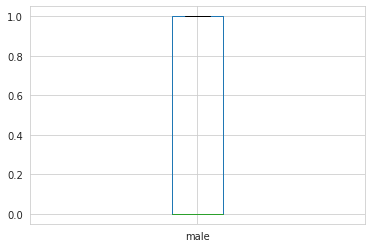

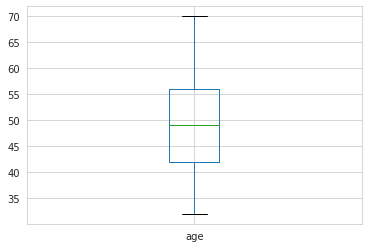

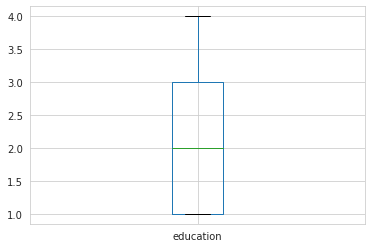

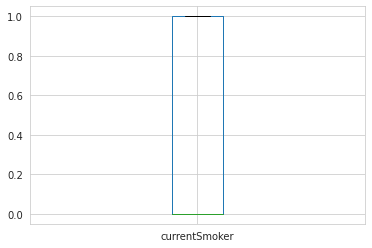

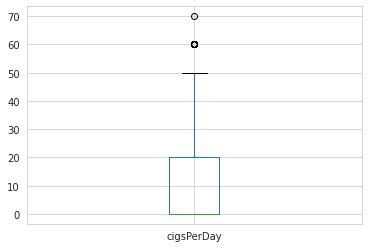

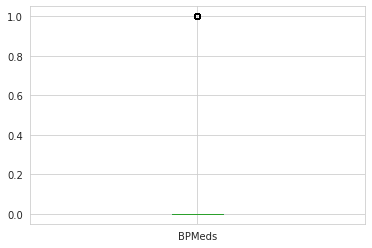

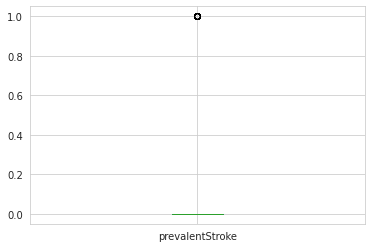

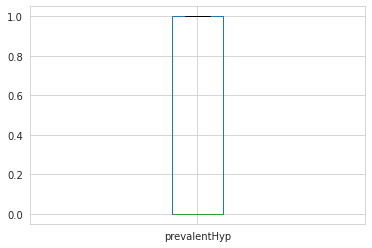

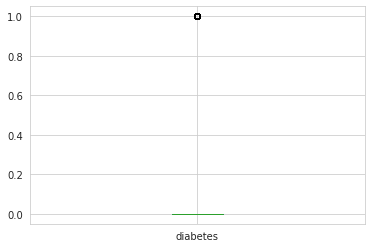

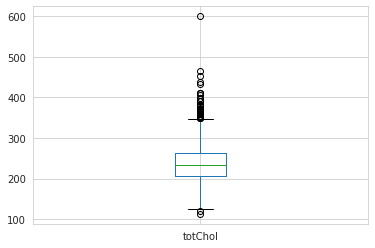

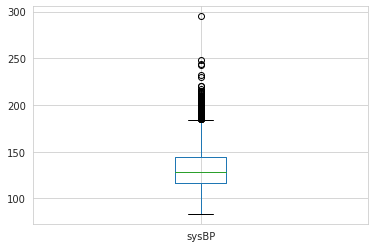

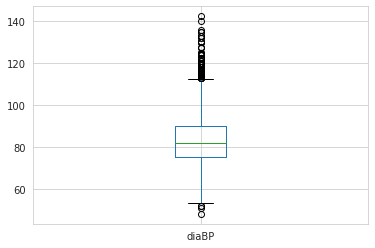

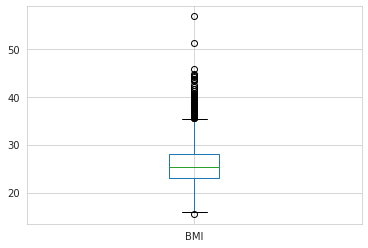

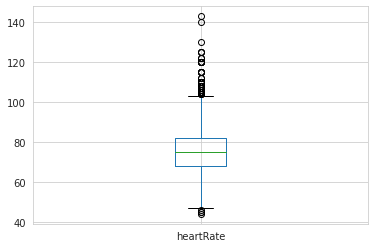

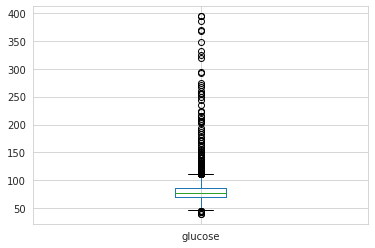

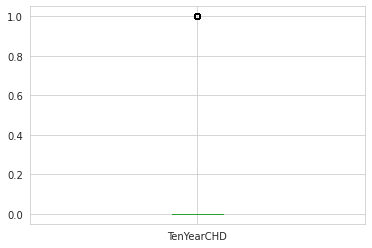

In [ ]:
df.dropna(inplace=True)   # observing the previous output, we can infer that count is not equal to 4238 for every column (some are NaN)

for col in df.columns:
  df.boxplot(column = col)         # box plot to observe the distribution of values in different columns
  plt.show()

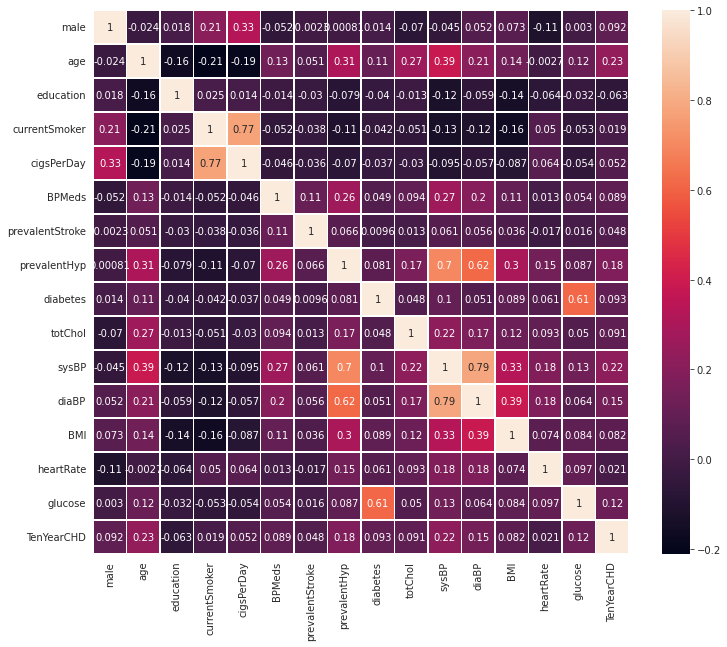

In [ ]:
import seaborn as sns 

fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


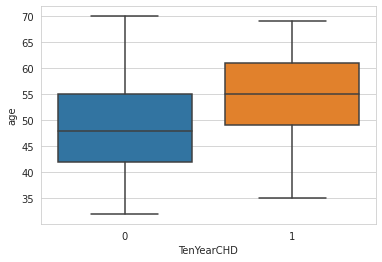

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


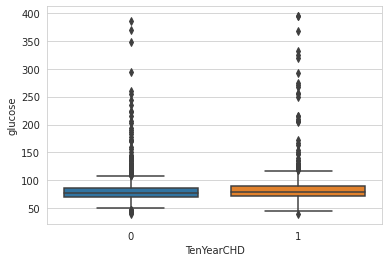

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


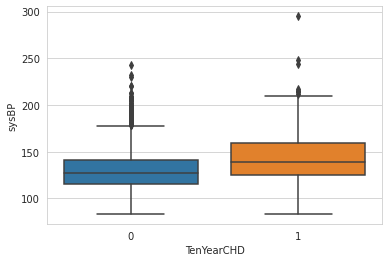

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


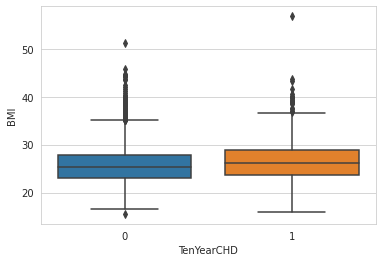

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


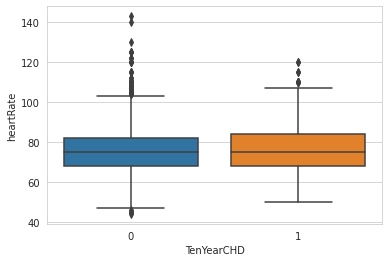

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


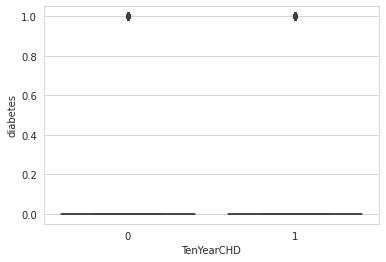

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


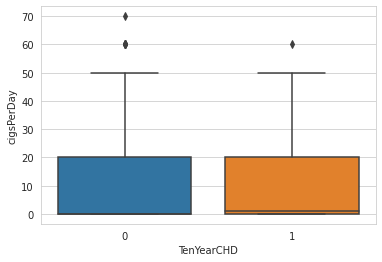

In [ ]:
sns.set_style("whitegrid")

features = ['age','glucose','sysBP','BMI','heartRate','diabetes','cigsPerDay']

for col in features:
  sns.boxplot('TenYearCHD', col, data=df) # discrete column = 'TenYearCHD', continuous = 'age'
  plt.xlabel('TenYearCHD')     # Set text for the x axis
  plt.ylabel(col)   # Set text for y axis
  plt.show()

From the correlation heatmap and boxplots, we have the following inferences:


1.   ***'currentSmoker'*** has high correlation with 'cigsPerDay' and logically 'cigsPerDay' provides all the info provided by 'currentSmoker'
2.   Similarly, ***'prevalentHyp', 'diaBP'*** can also be removed from the features list as they are highly correlated to 'sysBP' and 'sysBP' is more related to 'TenYearCHD'.
3.   ***'diabetes', 'education', 'male', 'cigsPerDay, 'heartRate', 'BPMeds', 'totChol', 'prevalentStroke', 'BMI'*** have very low correlation with the column to be predicted and hence do not affect it significantly. The poor relation is once again confirmed the respective box plots which look similar irrespective of the value of 'TenYearCHD'.







In [ ]:
df.drop(['currentSmoker','prevalentHyp','diabetes','education','heartRate','cigsPerDay','male','BPMeds','totChol','prevalentStroke','diaBP','BMI'], axis=1, inplace=True)
df.head()

,age,sysBP,glucose,TenYearCHD
0,39,106.0,77.0,0
1,46,121.0,76.0,0
2,48,127.5,70.0,0
3,61,150.0,103.0,1
4,46,130.0,85.0,0


In [ ]:
# one hot encoding skipped as there is NO categorical column in the feature list
# normalization
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
df[["ScaledAge"]] = scaler.fit_transform(df[["age"]])
df[["ScaledsysBP"]] = scaler.fit_transform(df[["sysBP"]])
df[["Scaledglucose"]] = scaler.fit_transform(df[["glucose"]])

df.drop(['age','glucose','sysBP'], axis=1, inplace=True)

In [ ]:
num_col=['ScaledAge','ScaledsysBP','Scaledglucose']

for col in num_col:
    print(df[col],'\n')

0      -1.233351
1      -0.415591
2      -0.181945
3       1.336754
4      -0.415591
          ...   
4231    0.986285
4232    2.154514
4233    0.051701
4234    0.168524
4237    0.285347
Name: ScaledAge, Length: 3656, dtype: float64 

0      -1.193695
1      -0.514637
2      -0.220378
3       0.798209
4      -0.107202
          ...   
4231    0.390774
4232    1.613079
4233    2.111055
4234   -0.265649
4237    0.051245
Name: ScaledsysBP, Length: 3656, dtype: float64 

0      -0.203127
1      -0.244956
2      -0.495930
3       0.884427
4       0.131505
          ...   
4231   -0.035811
4232   -0.119469
4233    0.173334
4234   -0.579588
4237    1.051743
Name: Scaledglucose, Length: 3656, dtype: float64 



In [ ]:
df.head()

,TenYearCHD,ScaledAge,ScaledsysBP,Scaledglucose
0,0,-1.233351,-1.193695,-0.203127
1,0,-0.415591,-0.514637,-0.244956
2,0,-0.181945,-0.220378,-0.495930
3,1,1.336754,0.798209,0.884427
4,0,-0.415591,-0.107202,0.131505


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('TenYearCHD', axis=1)
y = df.TenYearCHD
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)            # 80-20 split

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test,y_test)

0.8510928961748634

In [ ]:
# 90-10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test,y_test)

0.819672131147541

In [ ]:
# 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test,y_test)

0.8605287146763901

Looking at the model predition scores, score is increasing with increase in test/train split ratio, more the length of the test set more is the score.

---------



*Question 2:* Predicting house prices in Boston

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/boston.csv')
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [ ]:
df.shape

(506, 14)

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


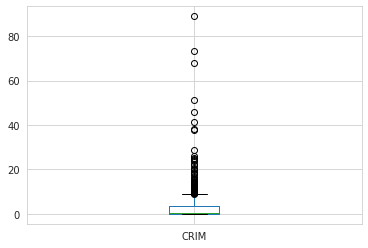

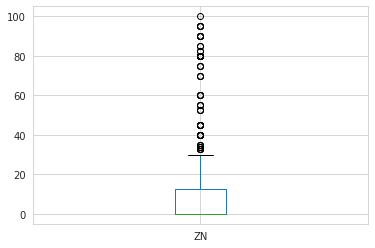

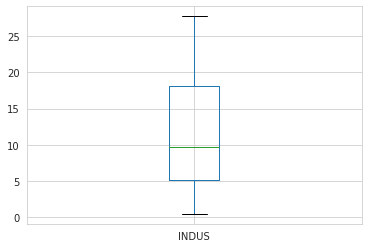

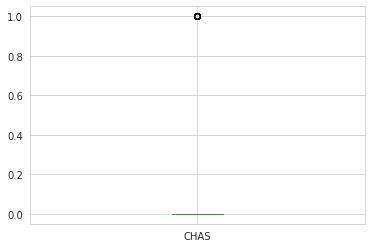

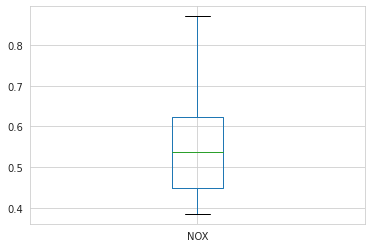

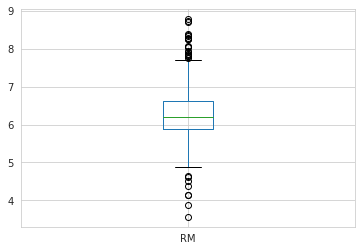

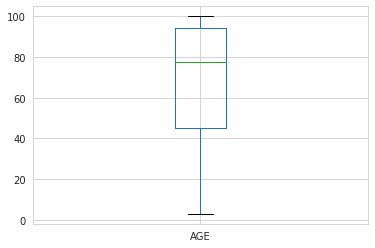

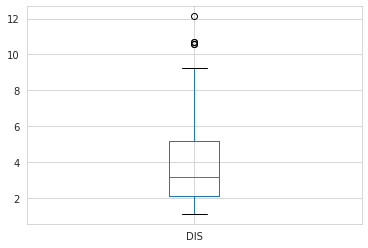

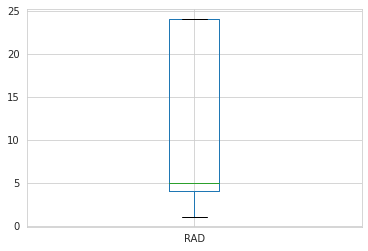

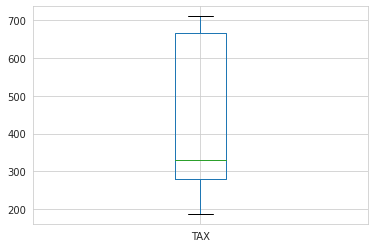

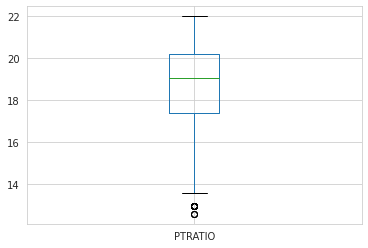

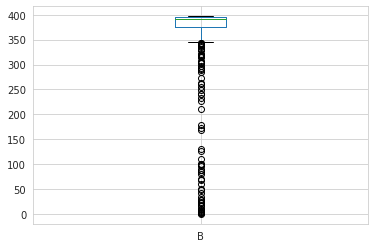

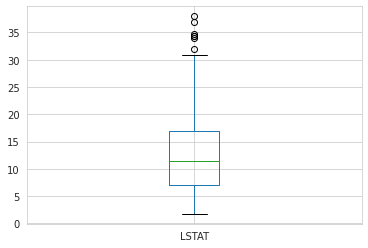

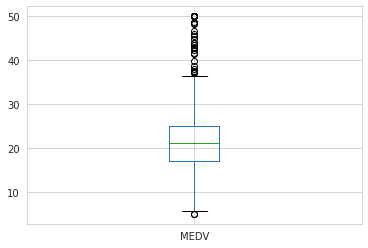

In [ ]:
# inference from count: this data does not have any NaN!

for col in df.columns:
  df.boxplot(column = col)             # box plot to observe the distribution of values in different columns
  plt.show()

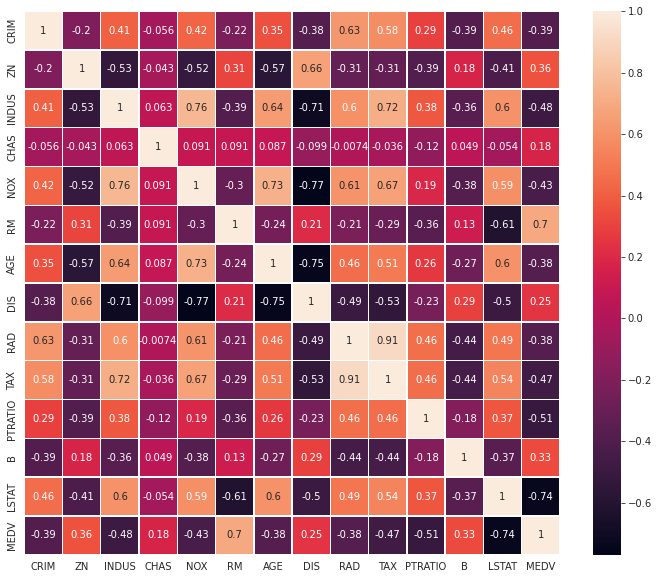

In [ ]:
import seaborn as sns 

fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

Proceeding in a way similar to the last question, we can deduce that 'CRIM'	'NOX'	'RM'	'PTRATIO'	'B' columns make a reasonable feature list. The reasoning is based on two things: columns having low correlation values	with 'MEDV' are discarded and out of two closely related columns, one is discarded from the feature list.

In [ ]:
df.drop(['CHAS','INDUS','ZN','LSTAT','AGE','DIS','RAD','TAX'], axis=1, inplace=True)
df.head()

,CRIM,NOX,RM,PTRATIO,B,MEDV
0,0.00632,0.538,6.575,15.3,396.90,24.0
1,0.02731,0.469,6.421,17.8,396.90,21.6
2,0.02729,0.469,7.185,17.8,392.83,34.7
3,0.03237,0.458,6.998,18.7,394.63,33.4
4,0.06905,0.458,7.147,18.7,396.90,36.2


In [ ]:
# one hot encoding skipped as there is NO categorical column in the feature list
# normalization
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
df[["Scaledcrim"]] = scaler.fit_transform(df[["CRIM"]])
df[["Scalednox"]] = scaler.fit_transform(df[["NOX"]])
df[["Scaledrm"]] = scaler.fit_transform(df[["RM"]])
df[["Scaledptratio"]] = scaler.fit_transform(df[["PTRATIO"]])
df[["Scaledb"]] = scaler.fit_transform(df[["B"]])

df.drop(['CRIM','NOX','RM','B','PTRATIO'], axis=1, inplace=True)

In [ ]:
num_col=['Scaledcrim','Scalednox','Scaledrm','Scaledptratio','Scaledb']

for col in num_col:
    print(df[col],'\n')

0     -0.419782
1     -0.417339
2     -0.417342
3     -0.416750
4     -0.412482
         ...   
501   -0.413229
502   -0.415249
503   -0.413447
504   -0.407764
505   -0.415000
Name: Scaledcrim, Length: 506, dtype: float64 

0     -0.144217
1     -0.740262
2     -0.740262
3     -0.835284
4     -0.835284
         ...   
501    0.158124
502    0.158124
503    0.158124
504    0.158124
505    0.158124
Name: Scalednox, Length: 506, dtype: float64 

0      0.413672
1      0.194274
2      1.282714
3      1.016303
4      1.228577
         ...   
501    0.439316
502   -0.234548
503    0.984960
504    0.725672
505   -0.362767
Name: Scaledrm, Length: 506, dtype: float64 

0     -1.459000
1     -0.303094
2     -0.303094
3      0.113032
4      0.113032
         ...   
501    1.176466
502    1.176466
503    1.176466
504    1.176466
505    1.176466
Name: Scaledptratio, Length: 506, dtype: float64 

0      0.441052
1      0.441052
2      0.396427
3      0.416163
4      0.441052
         ...   
501    0

In [ ]:
df.head()

,MEDV,Scaledcrim,Scalednox,Scaledrm,Scaledptratio,Scaledb
0,24.0,-0.419782,-0.144217,0.413672,-1.459000,0.441052
1,21.6,-0.417339,-0.740262,0.194274,-0.303094,0.441052
2,34.7,-0.417342,-0.740262,1.282714,-0.303094,0.396427
3,33.4,-0.416750,-0.835284,1.016303,0.113032,0.416163
4,36.2,-0.412482,-0.835284,1.228577,0.113032,0.441052


In [ ]:
X = df.drop('MEDV', axis=1)
y = df.MEDV
X_train, X_tv, y_train, y_tv = train_test_split(X, y, test_size=0.2)        # slicing the dataset in 80-20 ratio, 80 for training and 20 for combined validation & test
X_val, X_test, y_val, y_test = train_test_split(X_tv, y_tv, test_size=0.5)  # dividing the combined val and test data equally resulting in a 80-10-10 split

In [ ]:
# Model 1(out of 3): Ridge Regressor
from sklearn.linear_model import Ridge

clf = Ridge(alpha=0.001).fit(X_train, y_train)                # alpha value 0.001 after hyperparameter tuning
clf.score(X_val, y_val)

0.7400506990825104

In [ ]:
# Model 2(out of 3): SVM Regressor
from sklearn import svm

regr = svm.SVR().fit(X_train, y_train)
regr.score(X_val,y_val)

0.7324078614831337

In [ ]:
# Model 3(out of 3): Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=5, random_state=0).fit(X_train, y_train)
reg.score(X_val,y_val)

0.8147540444354481

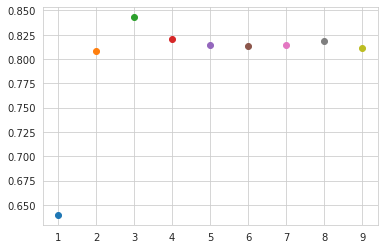

In [ ]:
# hyperparameter tuning of the best model
for i in range(1,10):
  reg = RandomForestRegressor(max_depth=i, random_state=0).fit(X_train, y_train)
  #print(i,': ',reg.score(X_val,y_val),'\n')
  plt.scatter(i,reg.score(X_val,y_val))
plt.show()

In [ ]:
# from the graph, it is clear that max_depth = 3 gives the best accuracy
reg = RandomForestRegressor(max_depth=3, random_state=0).fit(X_train, y_train)
reg.score(X_test,y_test)                # test accuracy

0.7184136436274453